In [1]:
import pandas as pd
import numpy as np

In [153]:
data = pd.read_excel('outputNew.xlsx')
for i in range(len(data.columns)):
    data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change()) # подсчёт логарифмической доходности

C:\Users\User\AppData\Local\Temp\ipykernel_7692\2636728522.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change()) # подсчёт логарифмической доходности


In [41]:
data.to_excel('outputNewReturns.xlsx', index=False)

In [155]:
data = pd.read_excel('outputNewReturns.xlsx')
eff = np.array([data.iloc[:, i].mean() for i in range(len(data.columns))]) # подсчёт эффективности

In [157]:
data -= eff[i]
data = data ** 2
risk = np.array([np.sqrt((data.iloc[:, i].sum()) / (len(data) - 1)) for i in range(len(data.columns))]) # подсчёт риска

In [159]:
print(eff)
print(risk)
data_er = pd.DataFrame({'company': data.columns, 'effiency': eff,'risk': risk}) # сбор данных в один датафрейм
#data_er.to_excel('outputNewEffRisk.xlsx', index=False)

[-9.09232930e-05 -5.42974958e-04  3.42934955e-04 ... -9.49282527e-04
 -1.34336897e-03  1.43987797e-04]
[0.0116448  0.02448819 0.02607773 ... 0.01290663 0.02161486 0.00100763]


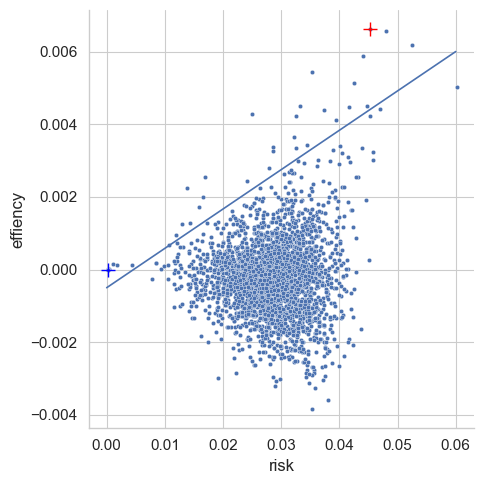

In [185]:
import seaborn as sns

sns.set_theme('paper', font_scale=1.25)

data_eff_risk = pd.DataFrame({'effiency': eff,'risk': risk, 'company': data.columns})
#data_eff_risk = pd.read_excel('outputNewEffRisk.xlsx')
sns.set_style("whitegrid")
sns.color_palette("bright")
import matplotlib.pyplot as plt
sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", s=10
) # график эффективности от рисков
plt.plot([0.0453002868549864], [0.00662147393101398], marker='+', color='red', markerfacecolor='red', markersize=10) # лучший по VaR
plt.plot([0.000148835564609203], [3.29364409007432*10**-7], marker='+', color='blue', markerfacecolor='blue', markersize=10) # лучший по CVaR
plt.plot(np.linspace(0, 0.06, num=1000), np.linspace(-0.0005, 0.006, num=1000)) # линия выше которой Парето оптимальные (точки выше формируют часть оболочки)
#plt.plot([0.025366149, 0.017833597, 0.021487727, 0.02826465, 0.014161555, 0.021200413, 0.020548387, 0.026248667, 0.02632262, 0.034473074, 0.018912858, 0.024987783],
       # [0.001832276, 0.000902195, 0.001594078, 0.002265553, 0.000471766, 0.001396771, 0.001242519, 0.001923504, 0.002242825, 0.00341725, 0.001131837, 0.001754088])

plt.savefig('Pareto.png')
data_pareto_optimal = data_eff_risk[data_eff_risk['effiency'] > 0.1008333 * data_eff_risk['risk'] - 0.0005] # выгрузка точек выше линии
data_pareto_optimal.to_excel('outputNewParetoOptimal.xlsx', index=False)

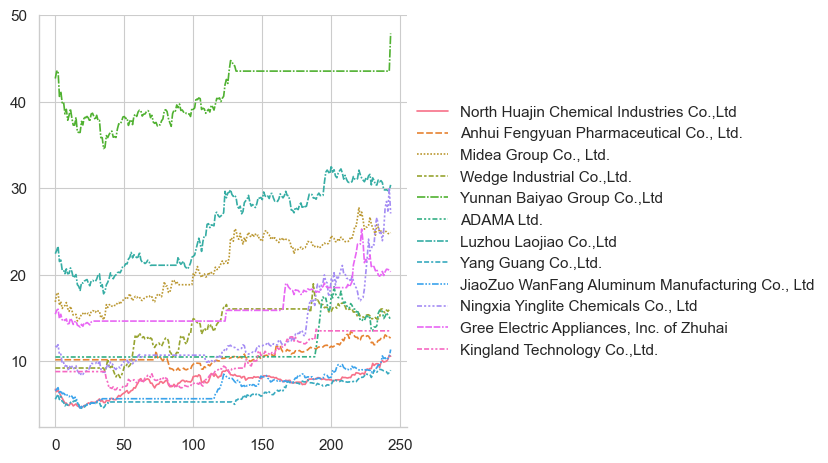

In [67]:
# цены акций 12 Парето оптимальных ради интереса
data = pd.read_excel('output.xlsx', usecols=["000059.SZ", "000153.SZ", "000333.SZ", "000534.SZ", "000538.SZ", "000553.SZ", "000568.SZ", "000608.SZ", "000612.SZ", "000635.SZ", "000651.SZ", "000711.SZ"])
data = data.rename(columns={'000059.SZ': 'North Huajin Chemical Industries Co.,Ltd', '000153.SZ': 'Anhui Fengyuan Pharmaceutical Co., Ltd.', '000333.SZ': 'Midea Group Co., Ltd.', '000534.SZ': 'Wedge Industrial Co.,Ltd.', '000538.SZ': 'Yunnan Baiyao Group Co.,Ltd', '000553.SZ': 'ADAMA Ltd.', '000568.SZ': 'Luzhou Laojiao Co.,Ltd', '000608.SZ': 'Yang Guang Co.,Ltd.', '000612.SZ': 'JiaoZuo WanFang Aluminum Manufacturing Co., Ltd', '000635.SZ': 'Ningxia Yinglite Chemicals Co., Ltd', '000651.SZ': 'Gree Electric Appliances, Inc. of Zhuhai ', '000711.SZ': 'Kingland Technology Co.,Ltd.'})
sns.set_theme('paper', font_scale=1.25)
sns.set_style("whitegrid")
g = sns.relplot(
    data=data, kind="line",
)

In [103]:
dataPareto = pd.read_excel('outputNewParetoOptimal.xlsx')
data_VaR = pd.read_excel('outputNewReturns.xlsx', usecols=dataPareto['company'])
data_VaR.to_excel('outputNewReturnsVaR.xlsx', index=False) # их нужно отсортировать,каждый столбец от меньшего к большему

In [ ]:
data_VaR = pd.read_excel('outputNewReturnsVaR.xlsx')
for col in data_VaR.columns:
    data_VaR[col] = np.sort(data_VaR[col])

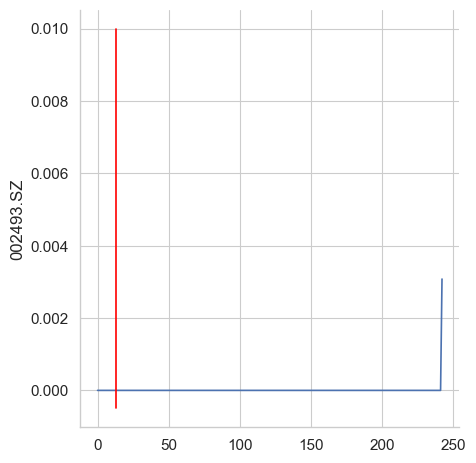

In [131]:
data_VaR.to_excel('outputNewReturnsVaR.xlsx', index=False)
sns.relplot(data=data_VaR, kind="line", x=np.arange(244), y="002493.SZ")
plt.plot([13, 13], [-0.0005, 0.01], color="red") # линия отсечения (5%)

In [115]:
import yfinance as yf
names = []
for i in data_VaR.columns:
    try:
        names.append(yf.Ticker(i).info['longName'])
    except KeyError:
        names.append('NoName')
new_data_VaR = pd.DataFrame({'company': data_VaR.columns, 'VaR': data_VaR.iloc [13], 'company_name': names}) # 13 потому что в сортированном от меньшего к большему 13 элемент будет 5% от 243 дней
new_data_VaR.to_excel('outputReturnsNewVaRResult.xlsx', index=False)

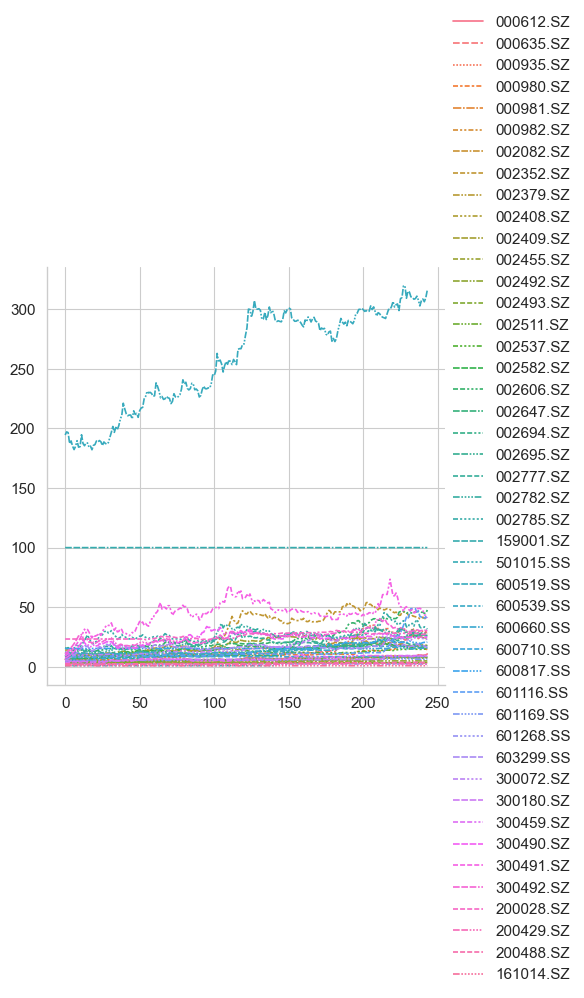

In [13]:
# проверка VaR
import seaborn as sns
dataPareto = pd.read_excel('outputNewParetoOptimal.xlsx')
data = pd.read_excel('outputNew.xlsx', usecols=dataPareto['company'])
sns.set_theme('paper', font_scale=1.25)
sns.set_style("whitegrid")
g = sns.relplot(
    data=data, kind="line",
)

In [117]:
data_СVaR = pd.DataFrame({'company': data_VaR.columns, 'СVaR': data_VaR.iloc[1:14].mean(), 'company_name': names})
data_СVaR.to_excel('outputReturnsNewCVaRResult.xlsx', index=False)

In [23]:
data = pd.read_excel('outputCheck.xlsx')
import yfinance as yf
names = []
sector = []
for i in data['ticker']:
    try:
        names.append(yf.Ticker(i).info['longName'])
    except KeyError:
        names.append('NoName')
for i in data['ticker']:
    try:
        sector.append(yf.Ticker(i).info['sector'])
    except KeyError:
        sector.append('NoName')
new_data= pd.DataFrame({'ticker': data['ticker'], 'mean_price': data['mean_price'], 'company_name': names, 'sector': sector})
new_data.to_excel('outputCheck_2.xlsx', index=False)

In [39]:
#Проверка случайности
dataCheck = pd.read_excel('outputCheck_2.xlsx')
data = pd.read_excel('outputNewReturns.xlsx', usecols=dataCheck['ticker'])
def getInvCount(arr, n):
    inv_count = 0
    for i in range(n):
        for j in range(i + 1, n):
            if (arr[i] > arr[j]):
                inv_count += 1
    if (inv_count > 14783.1664) and (inv_count <= 14862.8336):
        return True
    else:
        return False

res = []
for col in data.columns:
    res.append(getInvCount(data[col], len(data[col])))

new_data= pd.DataFrame({'ticker': dataCheck['ticker'], 'check': res, 'company_name': dataCheck['company_name'], 'sector': dataCheck['sector']})
new_data.to_excel('outputCheck_3.xlsx', index=False)
print(res)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


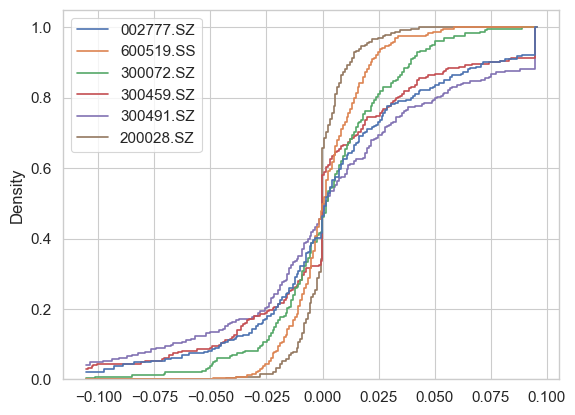

In [159]:
# Графики распределенийв
companies = ['300459.SZ', '300072.SZ', '002777.SZ', '200028.SZ', '300491.SZ', '600519.SS']
''' Zhejiang Jinke Tom Culture Industry Co., LTD.	               Communication Services
    Beijing Haixin Energy Technology Co.,Ltd.	                   Basic Materials
    Sichuan Jiuyuan Yinhai Software.Co.,Ltd	                       Technology
    China National Accord Medicines Corporation Ltd.	           Healthcare
    Shijiazhuang Tonhe Electronics Technologies Co.,Ltd.	       Industrials
    Kweichow Moutai Co., Ltd.	                                   Consumer Defensive'''

import seaborn as sns
data = pd.read_excel('outputNewReturns.xlsx', usecols=companies)
#sns.kdeplot(data, cumulative=True) #Кумулятивная функция распределения
#sns.kdeplot(data=data, common_norm=False); #график плотности
sns.histplot(data=data, bins=len(data['300459.SZ']), stat="density", element="step", fill=False, cumulative=True, common_norm=False); #эмпирическая функция распределения
#plt.pyplot.savefig('Density_3.png')

In [149]:
#Тест Шапиро-Уилка и тест Д’Агостино и Пирсона на нормальность выборки
from scipy.stats import shapiro, normaltest

data = pd.read_excel('outputNewReturns.xlsx', usecols=companies)
for col in data.columns:
    print(shapiro(data[col][1:]), normaltest(data[col][1:]))
    print()


ShapiroResult(statistic=0.9523214120958069, pvalue=3.63529100610579e-07) NormaltestResult(statistic=1.556481674522615, pvalue=0.4592131317995075)

ShapiroResult(statistic=0.9821759009631466, pvalue=0.003815521887607327) NormaltestResult(statistic=13.620980796026679, pvalue=0.0011021522741219917)

ShapiroResult(statistic=0.9741298345934732, pvalue=0.00020503813050379432) NormaltestResult(statistic=15.365200054884017, pvalue=0.0004607753115229773)

ShapiroResult(statistic=0.9308257752761213, pvalue=2.9667765408179777e-09) NormaltestResult(statistic=3.257744574843526, pvalue=0.1961506510042593)

ShapiroResult(statistic=0.9561162057294177, pvalue=9.617480318499513e-07) NormaltestResult(statistic=0.8256937030599645, pvalue=0.6617636231539917)

ShapiroResult(statistic=0.901123245244975, pvalue=1.4791836685026504e-11) NormaltestResult(statistic=29.85318692274929, pvalue=3.292022737161578e-07)



In [153]:
#разница между минимальным и максимальным значениями цен
data = pd.read_excel('outputNew.xlsx')
res = []
for col in data.columns:
    res.append(max(data[col])-min(data[col]))
new_data= pd.DataFrame({'ticker': data.columns, 'stat': res})
new_data.to_excel('outputMaxMin.xlsx', index=False)